In [ ]:
!pip install tensorflow

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers,losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [16]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

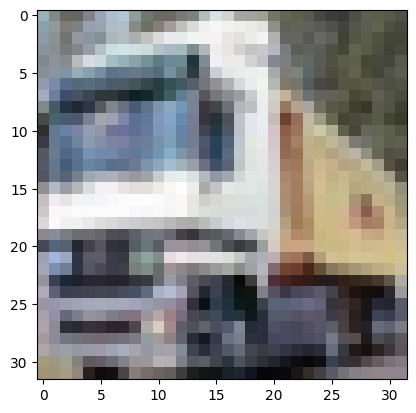

In [17]:
plt.imshow(x_train[1])

In [45]:
model=keras.Sequential()
#### Convolutional Part (Feature Extraction convolutional layers + pooling layers)
model.add(Conv2D(10, kernel_size=(3,3), padding='same' ,activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(20, kernel_size=(3,3), padding='same' ,activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())  # convert 2D into 1D for the FCNN

#### Fully connected part (Classification only dense layer + O/P layer )
model.add(Dense(128,activation='relu'))      #### Dense 1D
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))  ### O/ Layer  (Softmax ----> Classification)

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
history = model.fit(x_train, y_train, epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.3152 - loss: 2.0463 - val_accuracy: 0.5057 - val_loss: 1.3846
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5592 - loss: 1.2355 - val_accuracy: 0.6206 - val_loss: 1.0554
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6389 - loss: 1.0177 - val_accuracy: 0.6663 - val_loss: 0.9490
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6955 - loss: 0.8697 - val_accuracy: 0.7217 - val_loss: 0.8053
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7295 - loss: 0.7665 - val_accuracy: 0.7373 - val_loss: 0.7541
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7605 - loss: 0.6900 - val_accuracy: 0.7399 - val_loss: 0.7326
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7769 - loss: 0.6354 - val_accuracy: 0.7255 - val_loss: 0.7823
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7919 - loss: 0.60

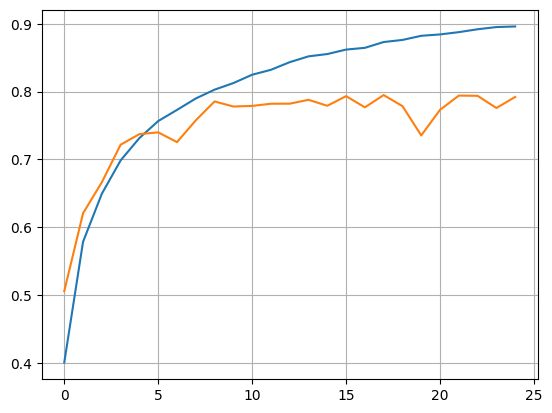

In [35]:
history.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

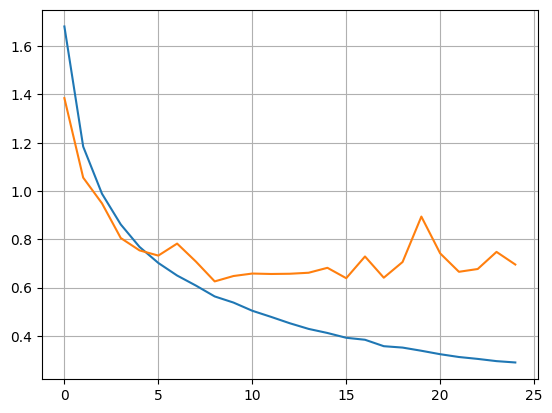

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()

In [37]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.6910


[0.695595920085907, 0.7921000123023987]